In [0]:
  
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd
  
  %matplotlib inline
  
  

In [0]:
df = pd.read_csv("https://s3.amazonaws.com/pycourse/train.csv")  #Recebendo o dataframe

In [17]:
df.head(10) #Mostra as 10 primeiras linhas e as colunas do dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
df.info() #informações sobre o dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
df.describe() #Descrição estatistica sobre o dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df = df.drop(['Cabin'],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [0]:
df = df.dropna() #Retirando os valores nulos do dataframe

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [24]:
df['Survived'].value_counts() #Contagem de sobreviventes 

0    424
1    288
Name: Survived, dtype: int64

In [25]:
df.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [26]:
df.Pclass.value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

## Plotando graficos sobre algumas variaveis do dataframe

Text(0.5, 1.0, 'Sobrevivencia por idade,(1=Sobreviveu)')

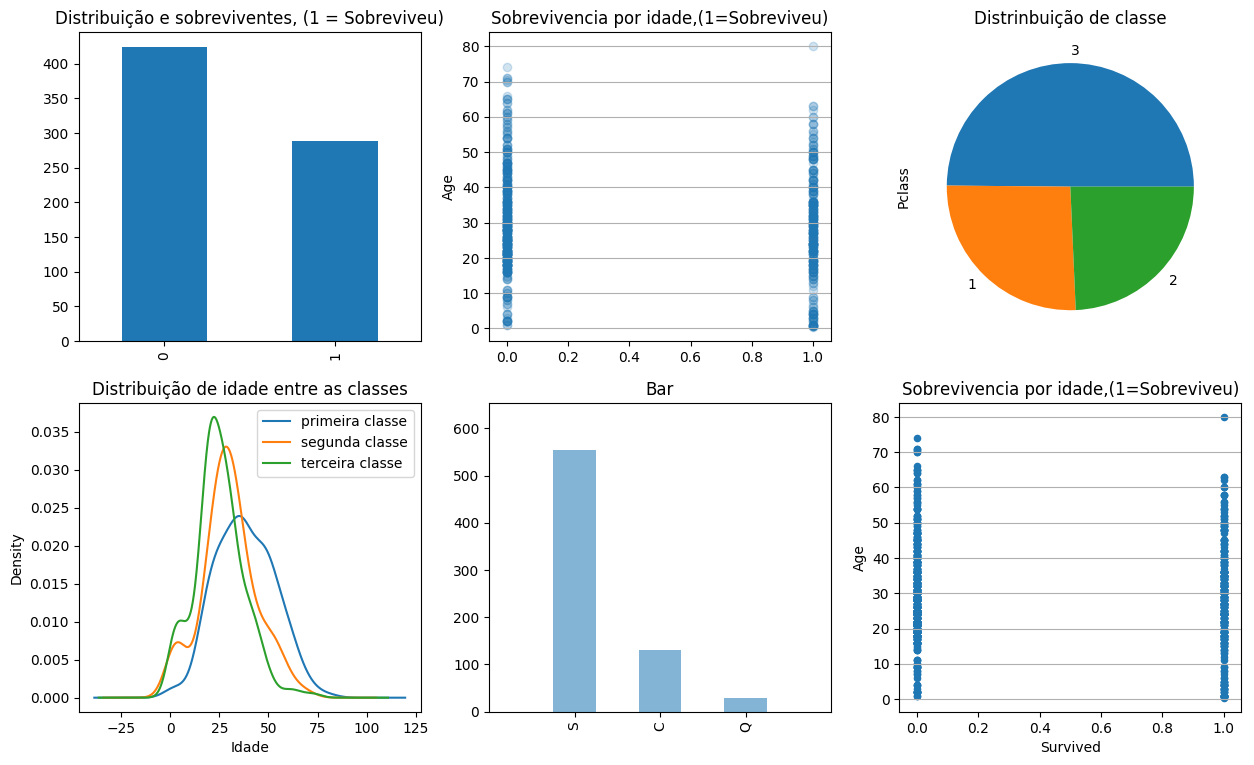

In [27]:
fig = plt.figure(figsize=(15,9), dpi=100)
#dpi: resolução da imagem
#figsize: largura e altura 

alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

#Grafico de barra
ax1 = plt.subplot2grid((2,3), (0,0))
df.Survived.value_counts().plot(kind='bar', ax = ax1)
plt.title("Distribuição e sobreviventes, (1 = Sobreviveu)")

#Grafico Scatter
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot) #Grafico para sobreviventes por idade
plt.ylabel("Age")
plt.grid(axis='y')
plt.title("Sobrevivencia por idade,(1=Sobreviveu)")

#Grafiico d pizza
ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="pie")
plt.title("Distrinbuição de classe")

#-----------------

#Grafico de linha 
plt.subplot2grid((2,3),(1,0))
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Idade")
plt.title("Distribuição de idade entre as classes")
plt.legend(('primeira classe', 'segunda classe', 'terceira classe'), loc='best')


ax5 = plt.subplot2grid((2,3),(1,1))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart, ax=ax5)
ax5.set_xlim(left=-1, right=len(df.Embarked.value_counts()))
ax5.set_ylim(top=df.Embarked.value_counts().max()+100)
plt.title("Bar")


ax6 = plt.subplot2grid((2,3), (1,2))
df.plot(kind='scatter', x='Survived', y='Age', ax=ax6)
plt.ylabel("Age")
plt.grid(axis='y')
plt.title("Sobrevivencia por idade,(1=Sobreviveu)")



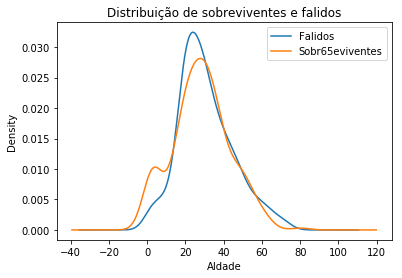

In [28]:
#Grafico de linha 


df.Age[df.Survived == 0].plot(kind='kde')
df.Age[df.Survived == 1].plot(kind='kde')
plt.xlabel("AIdade")
plt.title("Distribuição de sobreviventes e falidos")
plt.legend(('Falidos', 'Sobr65eviventes',), loc='best')


Text(0.5, 1.0, 'Analise geral da sobrevivencia, ( 1= sobrevivel, 0 = morreu)')

<Figure size 432x288 with 0 Axes>

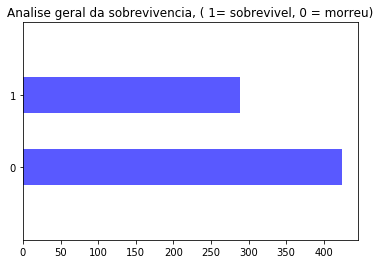

In [29]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color ='blue', alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts()))
plt.title("Analise geral da sobrevivencia, ( 1= sobrevivel, 0 = morreu)")

Text(0.5, 1.0, 'Analise geral da sobrevivencia, ( 1= sobrevivel, 0 = morreu)')

<Figure size 432x288 with 0 Axes>

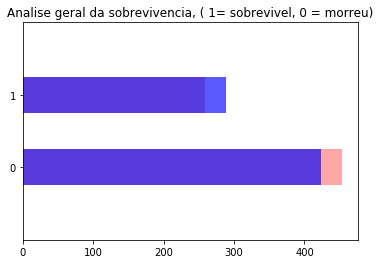

In [30]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()

df.Sex.value_counts().plot(kind='barh', color ='red', alpha=.35)
ax.set_ylim(-1, len(df.Survived.value_counts()))
df.Survived.value_counts().plot(kind='barh', color ='blue', alpha=.65)
ax.set_ylim(-1, len(df.Sex.value_counts()))
plt.title("Analise geral da sobrevivencia, ( 1= sobrevivel, 0 = morreu)")



In [0]:
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()


<Figure size 432x288 with 0 Axes>

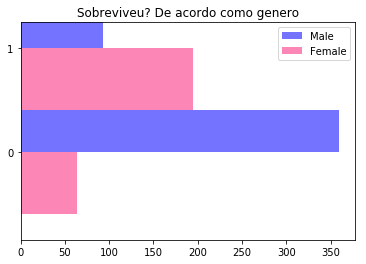

In [32]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df_male.plot(kind='barh', color='blue', width=0.4, label='Male', alpha=0.55, position=0)
df_female.plot(kind='barh', color='#FA2379', width=0.6, label='Female', alpha=0.55, position=1)
plt.title("Sobreviveu? De acordo como genero")
plt.legend(loc='best')





(-1, 2)

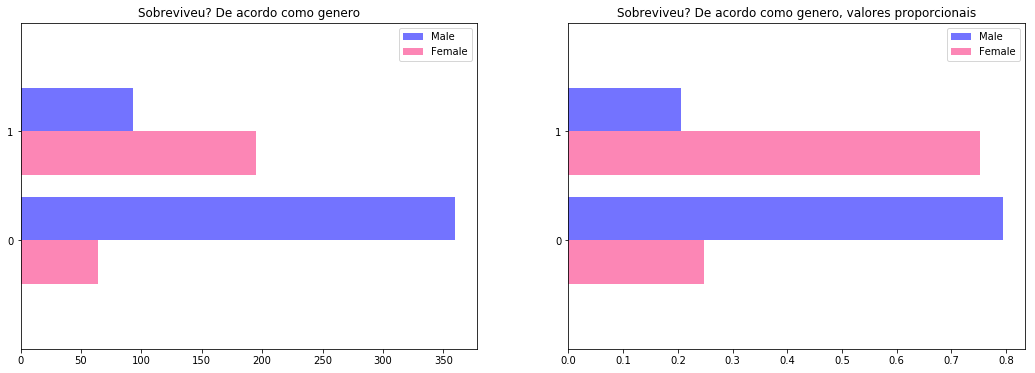

In [33]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)

df_male.plot(kind='barh', color='blue', width=0.4, label='Male', alpha=0.55, position=0)
df_female.plot(kind='barh', color='#FA2379', width=0.4, label='Female', alpha=0.55, position=1)

plt.title("Sobreviveu? De acordo como genero")
plt.legend(loc='best')
ax1.set_ylim(-1,2)


ax2 = fig.add_subplot(122)
(df_male/df_male.sum()).plot(kind='barh', color='blue', width=0.4, label='Male', alpha=0.55, position=0)
(df_female/df_female.sum()).plot(kind='barh', color='#FA2379', width=0.4, label='Female', alpha=0.55, position=1)
plt.title("Sobreviveu? De acordo como genero, valores proporcionais")
plt.legend(loc='best')
ax2.set_ylim(-1,2)

(-1, 2)

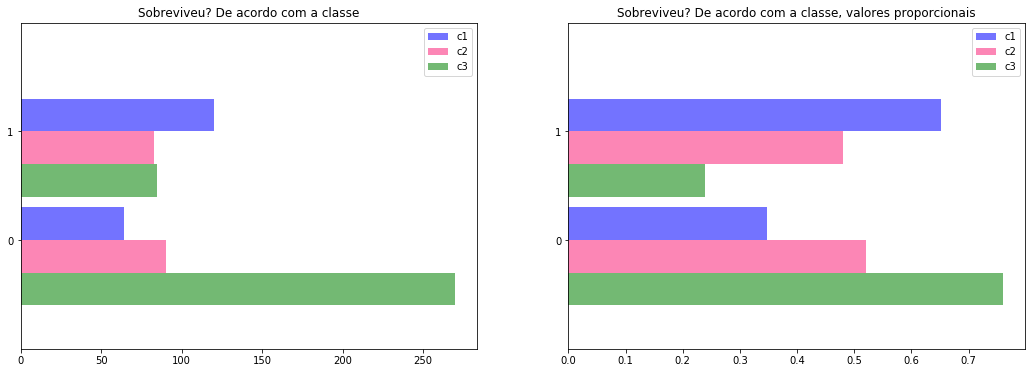

In [34]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)

df_c1 = df.Survived[df.Pclass == 1].value_counts().sort_index()
df_c2 = df.Survived[df.Pclass == 2].value_counts().sort_index()
df_c3 = df.Survived[df.Pclass == 3].value_counts().sort_index()



df_c1.plot(kind='barh', color='blue', width=0.3, label='c1', alpha=0.55, position=0)
df_c2.plot(kind='barh', color='#FA2379', width=0.3, label='c2', alpha=0.55, position=1)
df_c3.plot(kind='barh', color='green', width=0.3, label='c3', alpha=0.55, position=2)

plt.title("Sobreviveu? De acordo com a classe")
plt.legend(loc='best')
ax1.set_ylim(-1,2)


ax2 = fig.add_subplot(122)


(df_c1/df_c1.sum()).plot(kind='barh', color='blue', width=0.3, label='c1', alpha=0.55, position=0)
(df_c2/df_c2.sum()).plot(kind='barh', color='#FA2379', width=0.3, label='c2', alpha=0.55, position=1)
(df_c3/df_c3.sum()).plot(kind='barh', color='green', width=0.3, label='c3', alpha=0.55, position=2)

plt.title("Sobreviveu? De acordo com a classe, valores proporcionais")
plt.legend(loc='best')
ax2.set_ylim(-1,2)

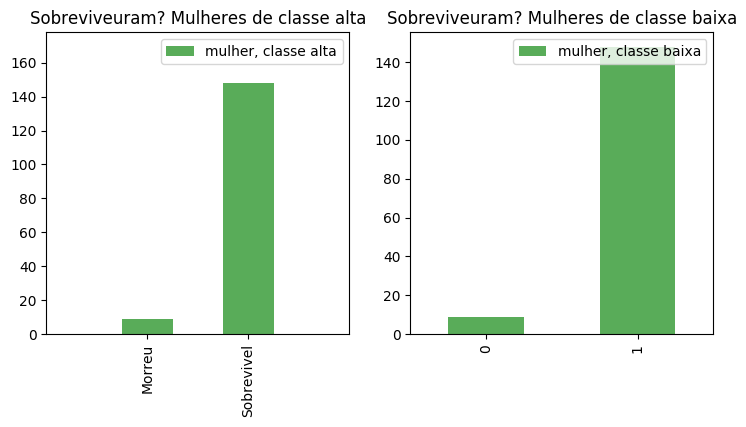

In [35]:
fig = plt.figure(figsize=(18,4), dpi=100)
alpha_level = 0.65
ax1 = fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts().sort_index()
female_highclass.plot(label='mulher, classe alta', color = 'green', alpha=alpha_level, kind='bar')
ax1.set_xticklabels(['Morreu', 'Sobrevivel'], rotation =90)
ax1.set_xlim(-1, len(female_highclass))
ax1.set_ylim(top=female_highclass.max()+30)
plt.title('Sobreviveuram? Mulheres de classe alta')
plt.legend(loc='best')


ax2 = fig.add_subplot(142)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts().sort_index()
female_lowclass.plot(label='mulher, classe baixa', color = 'green', alpha=alpha_level, kind='bar')
ax1.set_xticklabels(['Morreu', 'Sobrevivel'], rotation =90)
ax1.set_xlim(-1, len(female_lowclass))
ax1.set_ylim(top=female_lowclass.max()+30)
plt.title('Sobreviveuram? Mulheres de classe baixa')
plt.legend(loc='best')